In [46]:
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import VotingClassifier

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

In [21]:
##estimator, model, 알고리즘, classifier 

In [22]:
mnist = datasets.load_digits() 

In [23]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [24]:
features, labels = mnist.data, mnist.target

In [25]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

In [27]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [28]:
X_test.shape, y_test.shape

((360, 64), (360,))

In [ ]:
#### 싱글 모델 ####

In [53]:
dtree = DecisionTreeClassifier(
    criterion = 'gini', 
    max_depth = 8, 
    random_state = 35 
    
)

In [54]:
knn = KNeighborsClassifier(
    n_neighbors=100,
    n_jobs = None    
)

In [65]:
svm = SVC(
    C = 0.1, 
    gamma = 0.003,#곡선의 정도 
    kernel = 'rbf', #선의 유형 rbf는 곡선 linear는 직선
    probability=True #각 라벨링 값으로 될 가능성 구해주세요 
)

In [66]:
dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

In [67]:
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [68]:
svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test)

In [69]:
print('accuracy=================')
print('dtree >>', accuracy_score(y_test, dtree_predict))
print('knn >>', accuracy_score(y_test, knn_predict))
print('svn >>', accuracy_score(y_test,svm_predict))


accuracy=================
dtree >> 0.7916666666666666
knn >> 0.9166666666666666
svn >> 0.9111111111111111


In [87]:
dtree_proba = dtree.predict_proba(X_test)
print(dtree_proba[:2])#1일 확률이 제일 높음

knn_proba = knn.predict_proba(X_test)
print(knn_proba[:2])#1일 확률이 제일 높음

svm_proba = svm.predict_proba(X_test)
print(svm_proba[:2])#1일 확률이 제일 높음

[[0.         0.91549296 0.         0.02816901 0.02816901 0.
  0.         0.         0.02816901 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]]
[[0.   0.79 0.03 0.   0.01 0.   0.01 0.01 0.15 0.  ]
 [0.   0.   0.01 0.04 0.01 0.02 0.   0.71 0.09 0.12]]
[[1.61909501e-03 8.37123245e-01 8.46851330e-03 4.68997638e-03
  5.98323533e-03 1.12527577e-02 2.12384599e-03 8.35403620e-03
  1.08667747e-01 1.17175485e-02]
 [7.10006105e-04 1.58631385e-03 1.01727379e-03 7.41783967e-04
  9.84390180e-04 1.39186677e-03 5.04942538e-04 9.84676233e-01
  4.96126339e-03 3.42592608e-03]]


In [88]:
np.argmax(dtree_proba[:2])
np.argmax(knn_proba[:2])
np.argmax(svm_proba[:2])

17

In [89]:
np.argmin(dtree_proba[:2])
np.argmin(knn_proba[:2])
np.argmin(svm_proba[:2])

16

In [43]:
##### 앙상블 모델 #####

In [51]:
#하드 보팅 
voting_clf1 = VotingClassifier(
    estimators=[
        ('decision tree',dtree),
        ('knn', knn), 
        ('svm', svm)
    ], 
    weights =[1,1,1], 
    voting = 'hard'
) 

In [91]:
voting_clf1.fit(X_train, y_train)

hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9555555555555556

In [94]:
# ex) dtree: 2 knn :2 , svm = 1 ==> 2(2):1(1)==>다수결의 원칙에 따라 2로 판단

In [95]:
hard_voting_predicted[[1,50]]

array([7, 1])

In [97]:
#소프트 보팅 
voting_clf2 = VotingClassifier(
    estimators=[
        ('decision tree',dtree),
        ('knn', knn), 
        ('svm', svm)
    ], 
    weights =[1,1,1], 
    voting = 'soft'
) 

In [98]:
voting_clf2.fit(X_train, y_train)

soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9083333333333333

In [102]:
#dtree, knn, svm, hard voting, soft voting
#0.791, 0.916, 0.911, 0.955 ,0.908

df = pd.DataFrame({
            "방법":['dtree','knn','svm','hard_voting','soft_voting'],
            "predict":[0.791,0.916,0.911,0.955,0.908]
})

df

,방법,predict
0,dtree,0.791
1,knn,0.916
2,svm,0.911
3,hard_voting,0.955
4,soft_voting,0.908


<AxesSubplot:xlabel='방법', ylabel='predict'>

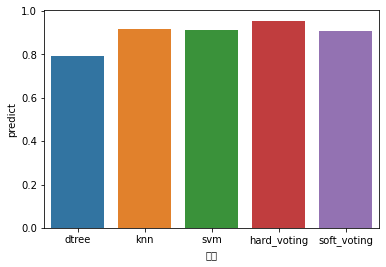

In [106]:
###그래프를 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)
sns.barplot(x="방법", y="predict", data=df)
